In [15]:
from torchvision import datasets, transforms
from PIL import Image
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [17]:
data_transform = transforms.Compose([
    transforms.Resize([50, 50]),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [18]:
dataset = datasets.ImageFolder(r'C:\Users\Asus\Desktop\datasets\GTSRB\GTSRB\Final_Training\Images', transform=data_transform)
# val_dataset = datasets.ImageFolder(r'C:\Users\Asus\Desktop\datasets\GTSRB\GTSRB\Final_Test\Images', transform=test_transform)

In [19]:
type(dataset[600][0])

torch.Tensor

In [26]:
dataset[0][0].shape

torch.Size([3, 50, 50])

In [27]:
train_size = int(len(dataset) * 0.8)
train_size

31367

In [28]:
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset)-train_size])
len(train_dataset)

31367

In [29]:
training_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

In [30]:
dataset[23000][1]

14

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


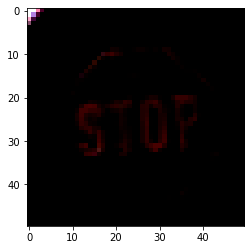

In [31]:
plt.imshow(dataset[23000][0].permute(1, 2, 0), cmap="gray")

# Could not find data of sign names, so had to write manually

In [32]:
class_names = {
    0: 'speed limit 20 km/h',
    1: 'speed limit 30 km/h',
    2: 'speed limit 50 km/h',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vechiles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vechiles',
    16: 'Vechiles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vechiles over 3.5 metric tons'
    
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'End of no passing')

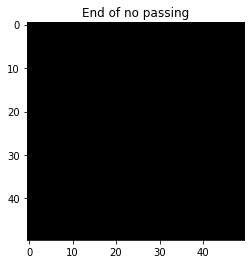

In [33]:
plt.imshow(val_dataset[2000][0].permute(1, 2, 0), cmap="gray")
plt.title(class_names[val_dataset[2000][1]])

In [34]:
training_loader_batch = next(iter(training_loader))

In [35]:
images, labels = training_loader_batch
labels

tensor([25,  1,  8, 28, 15,  8,  1, 38,  7,  2, 26,  6, 17, 12,  3, 13, 13, 12,
        15, 33, 33,  4,  8, 29, 35, 12,  7, 41, 23,  1, 10, 13, 26, 38,  3, 18,
         8,  1, 13,  5,  5,  5, 31,  1, 18,  9, 37, 18,  2, 40, 16, 11,  1, 13,
         9, 34, 13,  5, 20, 26, 40, 18,  1, 18])

In [39]:
images[0].shape

torch.Size([3, 50, 50])

In [116]:
val_loader_batch = next(iter(validation_loader))
images, labels = val_loader_batch
labels

tensor([28,  5,  4, 10, 26, 13,  1, 38, 15, 37, 19, 26, 25, 15, 11, 26, 14, 18,
         3,  4, 30, 33, 29,  5, 35, 11, 12, 25,  7, 11, 10, 35, 34,  4,  1, 13,
        28,  3,  3, 13, 15, 13, 25, 34,  9, 23, 25,  1, 33,  2, 13, 12, 33, 17,
         0, 24,  7, 27,  4,  5, 15, 20, 28,  2])

In [65]:
from torch import flatten

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, 
                               kernel_size = 5, stride = 1, padding = 0)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, 
                               kernel_size = 5, stride = 1, padding = 0)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 25, 
                               kernel_size = 3, stride = 1, padding = 0)
        self.linear1 = nn.Linear(225, 120)
        self.linear2 = nn.Linear(120, 80)
        self.linear3 = nn.Linear(80, 43)
        self.sigmoid = nn.ReLU()
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.sigmoid(x)
        x = self.avgpool(x)
        x = self.conv2(x)
        x = self.sigmoid(x)
        x = self.avgpool(x)
        x = self.conv3(x)
        x = self.sigmoid(x)
        x = self.avgpool(x)
        x = flatten(x, 1)
        x = self.linear1(x)
        x = self.sigmoid(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        x = self.linear3(x)
        return x

In [66]:
model = Model().to(device)

In [67]:
from torchsummary import summary

summary(model, (3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         AvgPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         AvgPool2d-6             [-1, 16, 9, 9]               0
            Conv2d-7             [-1, 25, 7, 7]           3,625
              ReLU-8             [-1, 25, 7, 7]               0
         AvgPool2d-9             [-1, 25, 3, 3]               0
           Linear-10                  [-1, 120]          27,120
             ReLU-11                  [-1, 120]               0
           Linear-12                   [-1, 80]           9,680
             ReLU-13                   [-1, 80]               0
           Linear-14                   

In [68]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [69]:
epochs = 10
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
    
    for inputs, labels in training_loader: 
        inputs = inputs.to(device) #GPU
        labels = labels.to(device) #GPU
        outputs = model(inputs)
        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
    else: 
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device) #GPU
                val_labels = val_labels.to(device) #GPU
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)
                
                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_corrects += torch.sum(val_preds == val_labels.data)
          
        epoch_loss = running_loss/len(training_loader)
        epoch_acc = running_corrects.float()/len(train_dataset)*100
        running_loss_history.append(epoch_loss)
        running_corrects_history.append(epoch_acc)
        
        val_epoch_loss = val_running_loss/len(validation_loader)
        val_epoch_acc = val_running_corrects.float()/len(val_dataset)*100
        val_running_loss_history.append(val_epoch_loss)
        val_running_corrects_history.append(val_epoch_acc)
    
    print('epoch: ', (e+1))
    print('training loss: {:.4f}, training accuracy: {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation accuracy: {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch:  1
training loss: 2.1299, training accuracy: 40.6319 
validation loss: 0.9348, validation accuracy: 70.5177 
epoch:  2
training loss: 0.6173, training accuracy: 80.9864 
validation loss: 0.4797, validation accuracy: 84.8125 
epoch:  3
training loss: 0.3604, training accuracy: 89.1797 
validation loss: 0.3083, validation accuracy: 90.5254 
epoch:  4
training loss: 0.2551, training accuracy: 92.3263 
validation loss: 0.2245, validation accuracy: 93.8536 
epoch:  5
training loss: 0.1833, training accuracy: 94.3826 
validation loss: 0.2011, validation accuracy: 94.2744 
epoch:  6
training loss: 0.1460, training accuracy: 95.5845 
validation loss: 0.1506, validation accuracy: 96.2127 
epoch:  7
training loss: 0.1048, training accuracy: 96.9363 
validation loss: 0.1362, validation accuracy: 96.5315 
epoch:  8
training loss: 0.0919, training accuracy: 97.1881 
validation loss: 0.1524, validation accuracy: 95.7536 
epoch:  9
training loss: 0.0766, training accuracy: 97.6376 
validation 

In [140]:
test_dataset = datasets.ImageFolder(r'C:\Users\Asus\Desktop\datasets\GTSRB\GTSRB\Final_Test', transform=data_transform)
test_dataset

Dataset ImageFolder
    Number of datapoints: 12630
    Root location: C:\Users\Asus\Desktop\datasets\GTSRB\GTSRB\Final_Test
    StandardTransform
Transform: Compose(
               Resize(size=[50, 50], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [141]:
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [142]:
test_loader_batch = next(iter(test_loader))
images, labels = test_loader_batch
images.shape

torch.Size([64, 3, 50, 50])

In [167]:
out = model(images[30:31]).detach()

In [168]:
_, preds = torch.max(out, 1)
preds

tensor([17])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


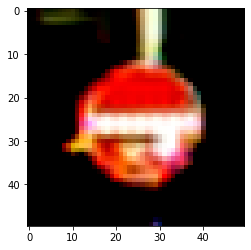

In [169]:
plt.imshow(images[30].permute(1, 2, 0), cmap="gray")

In [170]:
class_names[preds.item()]

'No entry'